# DBSCAN

El algoritmo `DBSCAN` usa la densidad de los puntos para formar los clusters. La densidad de los puntos se obtiene contando el número de
puntos dentro de una bola de radio $R$ y se clasifican en **núcleo**,
**frontera** y **ruido**. 

Un punto $x$ se clasifica como **núcleo** si la bola de radio $R$ y centro en $x$ tiene al menos $\tau$ puntos. Se clasifica como **frontera** si la bola tiene menos de $\tau$ puntos pero uno de ellos es núcleo. Un punto es **ruido** si no es núcleo ni frontera.

Los parámetros del algoritmo son $R$ y $\tau$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_classification, make_s_curve

In [2]:
color = np.array(["r", "b", "y", "g", "k", "c", "orange", "tomato", "gray", "m"])

Primero veamos cómo se comporta DBSCAN cuando el radio es muy pequeño. En la siguiente imagen se ve que todos los puntos son ruido. Los círculos indican el valor de $R$. **(A lo largo de este notebook, el color magenta indica los puntos marcados como ruido)**

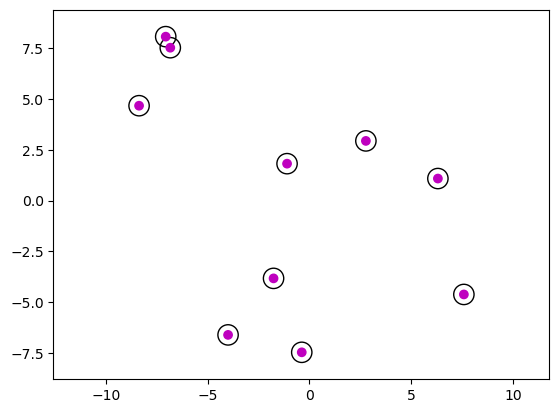

In [3]:
X, y = make_blobs(n_samples=10, centers=10, random_state=5)
eps = 0.5
db = DBSCAN(eps=eps, min_samples=2)
y_c = db.fit_predict(X)
for p in X:
    circle = plt.Circle((p[0], p[1]), eps, color='black', fill=False)
    plt.gca().add_patch(circle)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Cuando incrementamos el radio, se forman 3 cluster y sólo un punto se marca como ruido.

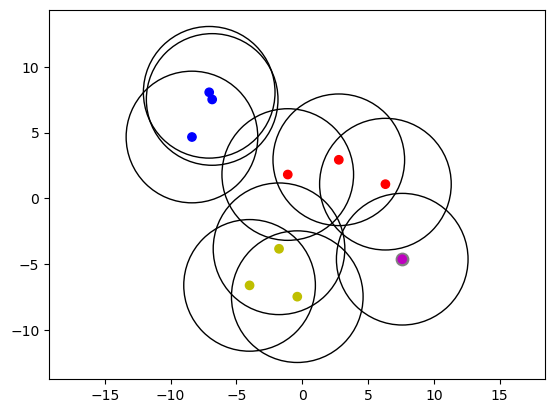

In [4]:
X, y = make_blobs(n_samples=10, centers=10, random_state=5)
eps = 5
db = DBSCAN(eps=eps, min_samples=2)
y_c = db.fit_predict(X)
for p in X:
    circle = plt.Circle((p[0], p[1]), eps, color='black', fill=False)
    plt.gca().add_patch(circle)
frontier = [i for i in range(len(X)) if i not in db.core_sample_indices_ ]
plt.scatter(X[frontier, 0], X[frontier, 1], c='gray', marker='o', s=80)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Si aumentamos mucho el radio, eventualmente todos los puntos quedan bajo el mismo cluster.

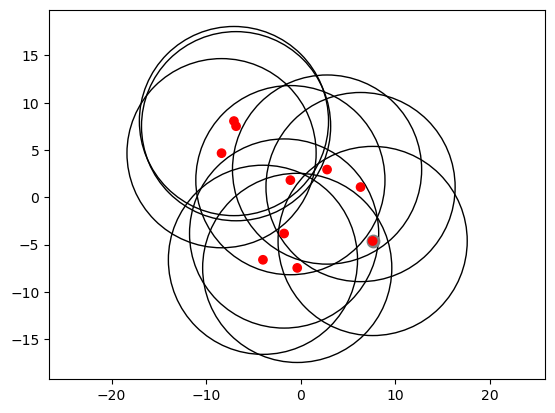

In [5]:
X, y = make_blobs(n_samples=10, centers=10, random_state=5)
eps = 10
y_c = DBSCAN(eps=eps, min_samples=2).fit_predict(X)
for p in X:
    circle = plt.Circle((p[0], p[1]), eps, color='black', fill=False)
    plt.gca().add_patch(circle)
frontier = [i for i in range(len(X)) if i not in db.core_sample_indices_ ]
plt.scatter(X[frontier, 0], X[frontier, 1], c='gray', marker='o', s=80)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

> **_Actividad:_** Modifique los datos inicales y observe los cambios.

 
Ahora veremos algunos ejemplos sencillos donde se muestran particiones usando DBSCAN. Primero veamos cuando los cluster están bien separados y con una forma convexa. En este caso eligiendo bien los parámetros, la división se hace de manera correcta.

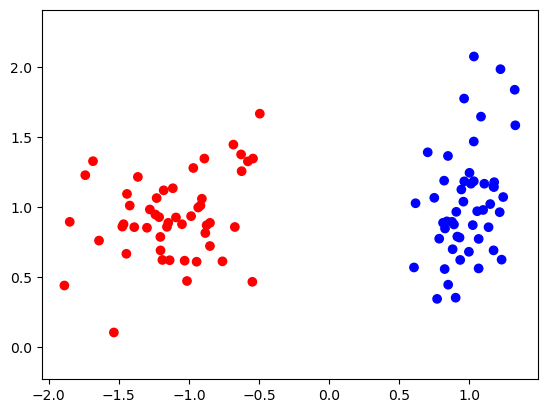

In [6]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
y_c = DBSCAN(eps=.5, min_samples=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

El siguiente es un ejemplo de dos clusters que no se pueden separa con k-means. Las formas de luna se aprecian claramente.

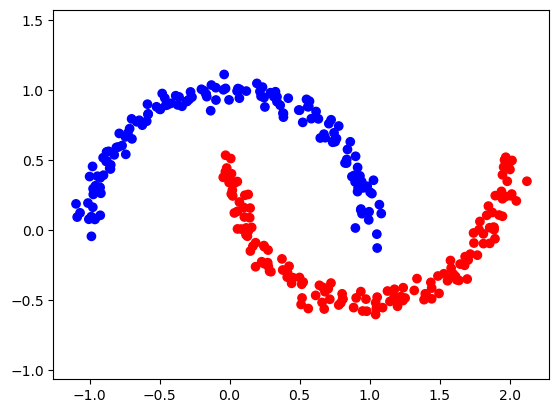

In [9]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)
y_c = DBSCAN(eps=.2, min_samples=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Este es otro ejemplo de lunas pero más juntas. Requiere un ajuste en el radio pero el algoritmo separa bien las dos lunas. Note que sale unos puntos marcados como ruido.

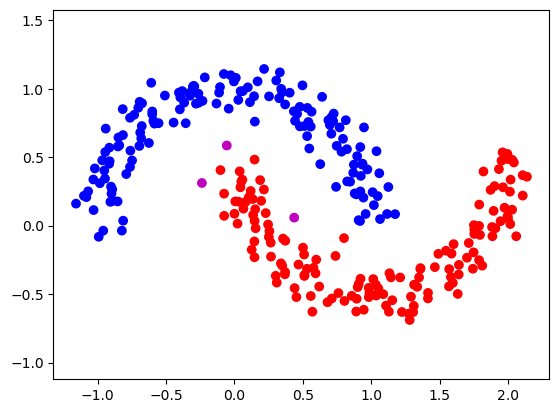

In [10]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=1)
y_c = DBSCAN(eps=.15, min_samples=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Ahora veamos cómo varía la partición en un mismo conjunto de datos si variamos el radio. Note que mientras más pequeño el radio, se producen más clusters y también comienzan a aparecer puntos de ruido. Recuerde que al ser un problema no supervizado no  contamos con una respuesta correcta y en general no es posible elegir la mejor partición.

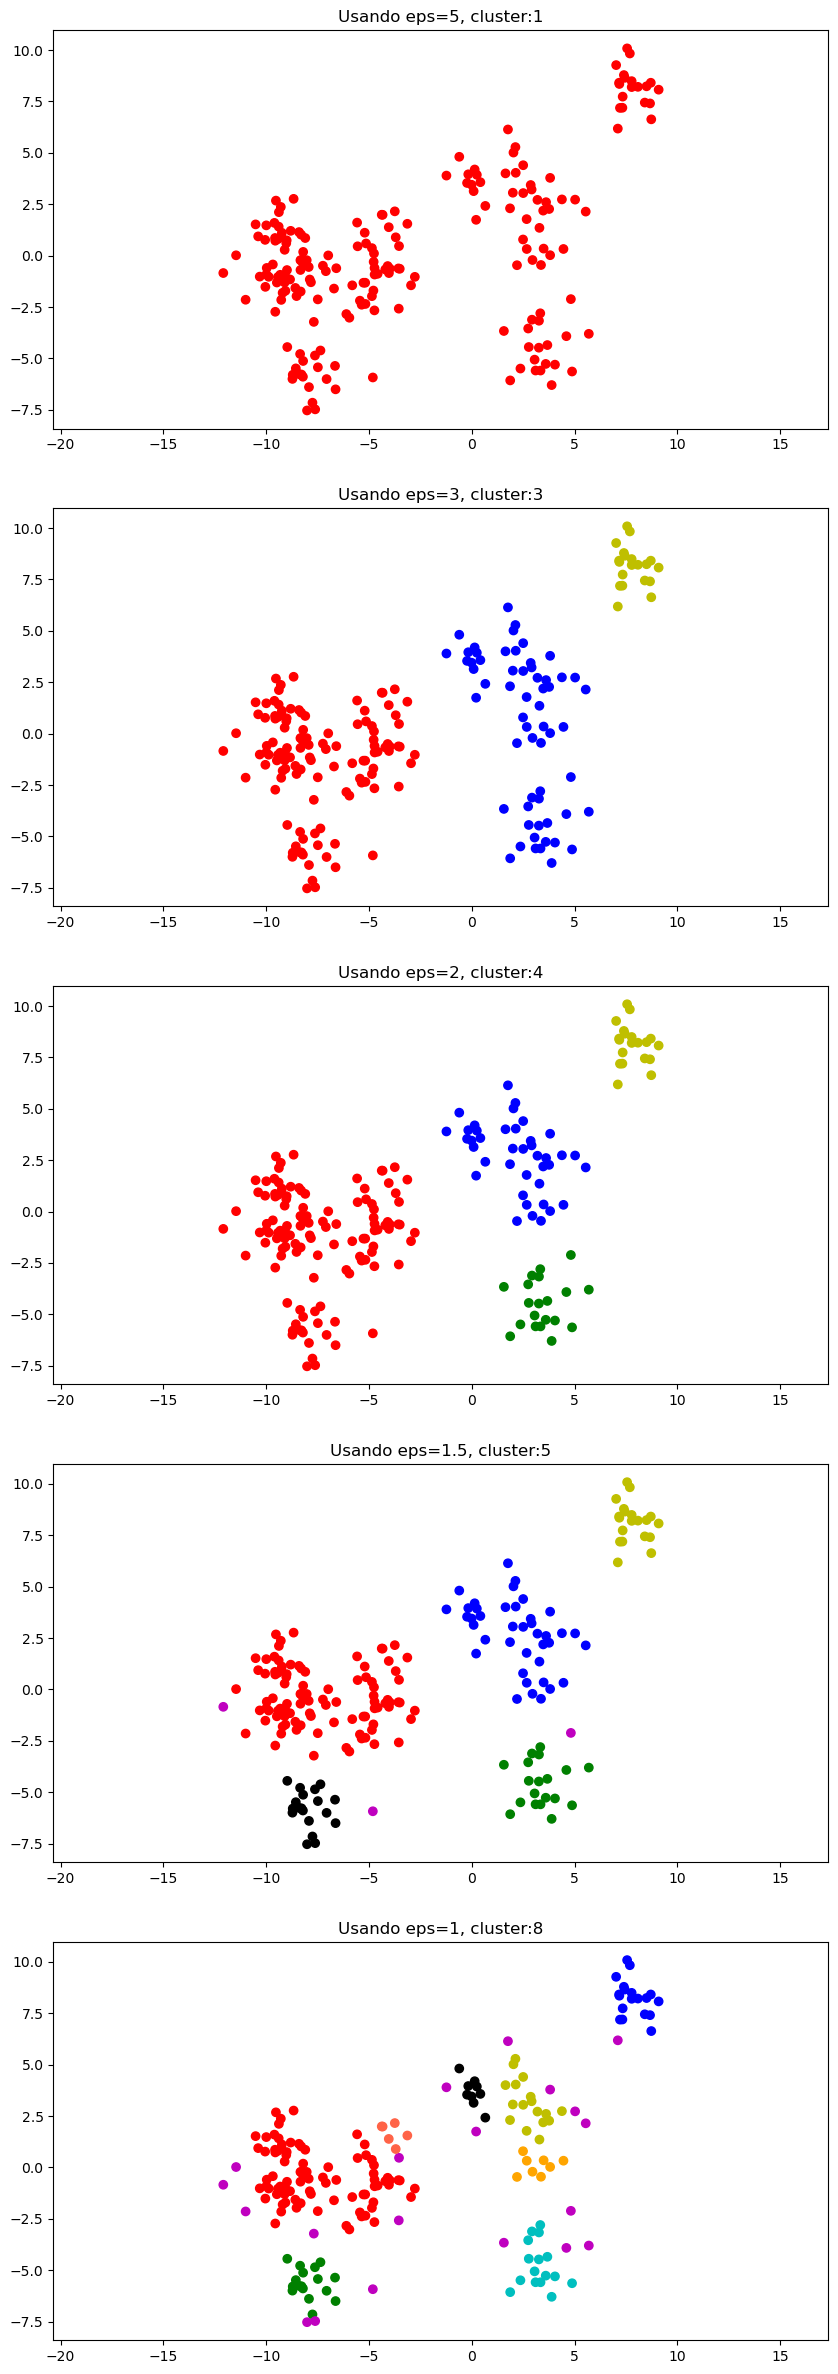

In [11]:
X, y = make_blobs(n_samples=200, centers=10, random_state=3)
R = [5, 3, 2, 1.5, 1]
_, ax = plt.subplots(len(R), 1, figsize=(10, 30))
for i, r in enumerate(R):
    db = DBSCAN(eps=r, min_samples=5)
    db.fit(X)
    y_c = db.labels_
    n_clusters = len(set(y_c)) - (1 if -1 in y_c else 0)
    ax[i].scatter(X[:, 0], X[:, 1], c=color[y_c])
    ax[i].set_title(f"Usando eps={r}, cluster:{n_clusters}")
    ax[i].axis('equal')
plt.show()

Elegir una partición depende de nuestro entendimiento del problema y se debe analizar y crear hipótesis de qué está pasando con los datos. Al final, con suficiente experiencia, se podrá elegir una partición sobre otra.